MSC预处理

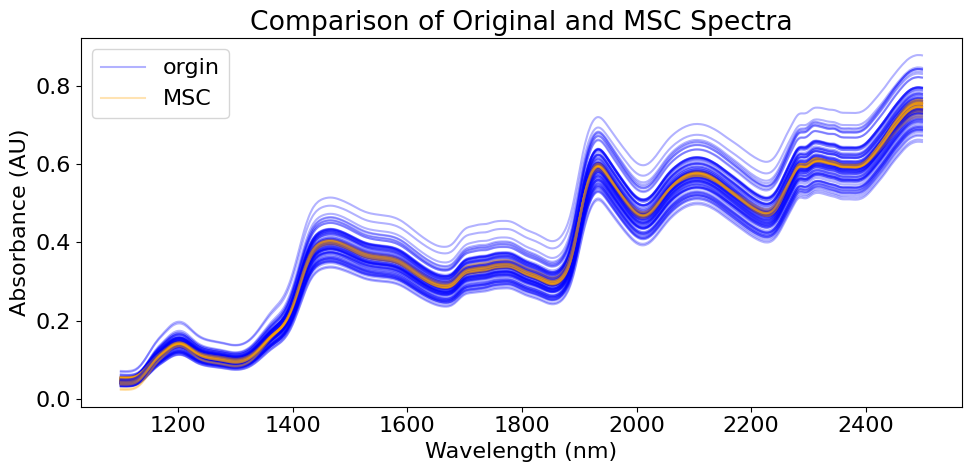

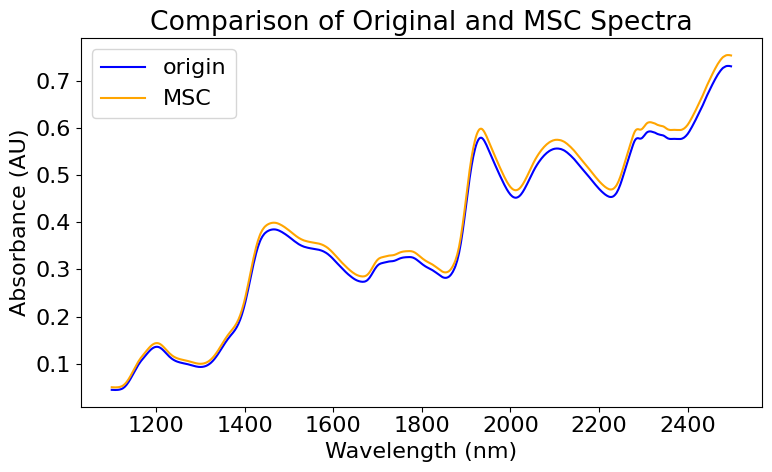

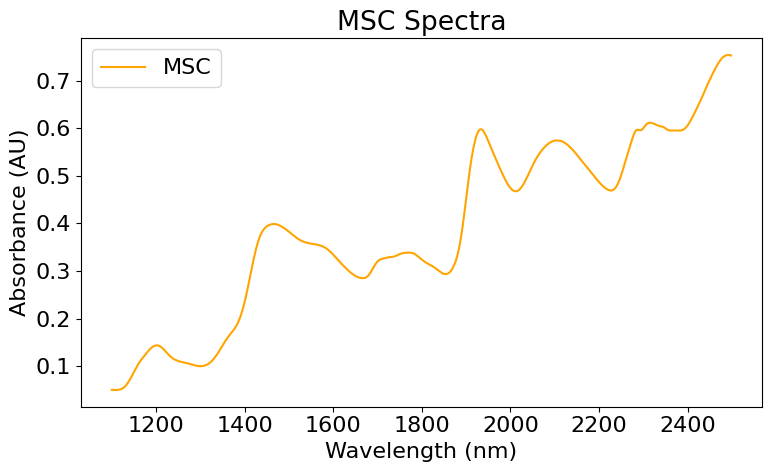

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

data_path = 'D:/A/CSU/数据集/corn_xlsl/m5_corn.xlsx'
df = pd.read_excel(data_path)
spectra = df.iloc[:, :700].values 

def perform_msc(X):
        mean_spectrum = np.mean(X, axis=0)
        corrected_X = np.zeros_like(X)
        for i in range(X.shape[0]):
            p = np.polyfit(mean_spectrum, X[i, :], 1)
            corrected_X[i, :] = (X[i, :] - p[1]) / p[0]
        return corrected_X

# Dataprocessing
preprocess_method = 'MSC'
spectra_msc = perform_msc(spectra)

# paint spectra processing and before
wavelengths = np.arange(1100, 1100 + 2 * 700, 2)
plt.figure(figsize=(10, 5))
for i in range(spectra.shape[0]):  
    plt.plot(wavelengths, spectra[i], color='blue', alpha=0.3, label='orgin' if i == 0 else "")
    plt.plot(wavelengths, spectra_msc[i], color='orange', alpha=0.3, label='MSC' if i == 0 else "")

plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.title('Comparison of Original and MSC Spectra')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wavelengths, spectra[0], color='blue', label='origin')
plt.plot(wavelengths, spectra_msc[0], color='orange', label='MSC')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.title('Comparison of Original and MSC Spectra')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wavelengths, spectra_msc[0], color='orange', label='MSC')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.title('MSC Spectra')
plt.legend()
plt.tight_layout()
plt.show()

SNV预处理

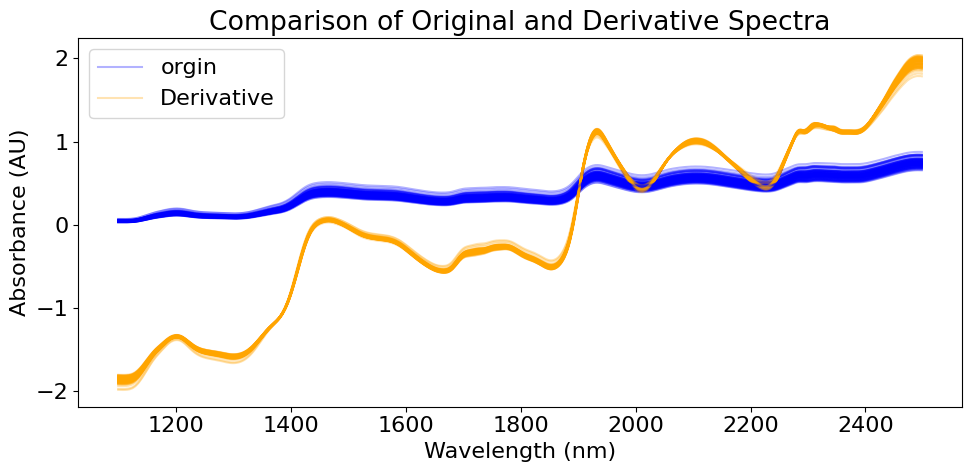

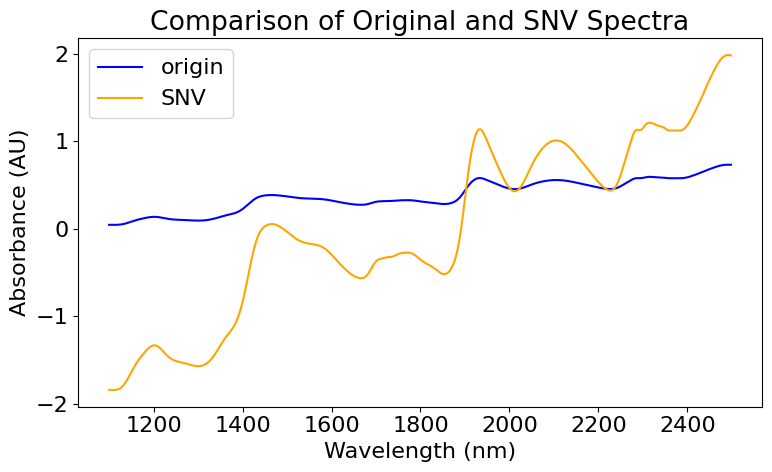

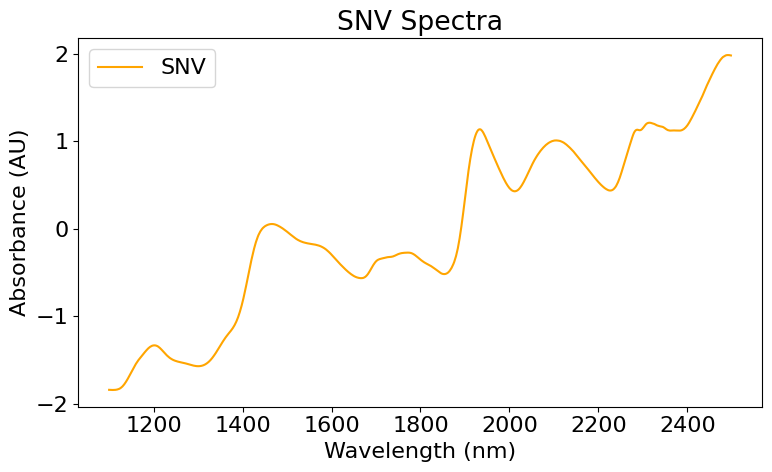

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

data_path = 'D:/A/CSU/数据集/corn_xlsl/m5_corn.xlsx'
df = pd.read_excel(data_path)
spectra = df.iloc[:, :700].values 

def perform_standard_normal_variate(X):
    return (X - np.mean(X, axis=1)[:, np.newaxis]) / np.std(X, axis=1)[:, np.newaxis]

# Dataprocessing
preprocess_method = 'SNV'
spectra_snv = perform_standard_normal_variate(spectra)

# paint spectra processing and before
wavelengths = np.arange(1100, 1100 + 2 * 700, 2)
plt.figure(figsize=(10, 5))
for i in range(spectra.shape[0]):  
    plt.plot(wavelengths, spectra[i], color='blue', alpha=0.3, label='orgin' if i == 0 else "")
    plt.plot(wavelengths, spectra_snv[i], color='orange', alpha=0.3, label='Derivative' if i == 0 else "")

plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.title('Comparison of Original and Derivative Spectra')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wavelengths, spectra[0], color='blue', label='origin')
plt.plot(wavelengths, spectra_snv[0], color='orange', label='SNV')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.title('Comparison of Original and SNV Spectra')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wavelengths, spectra_snv[0], color='orange', label='SNV')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.title('SNV Spectra')
plt.legend()
plt.tight_layout()
plt.show()

去趋势预处理

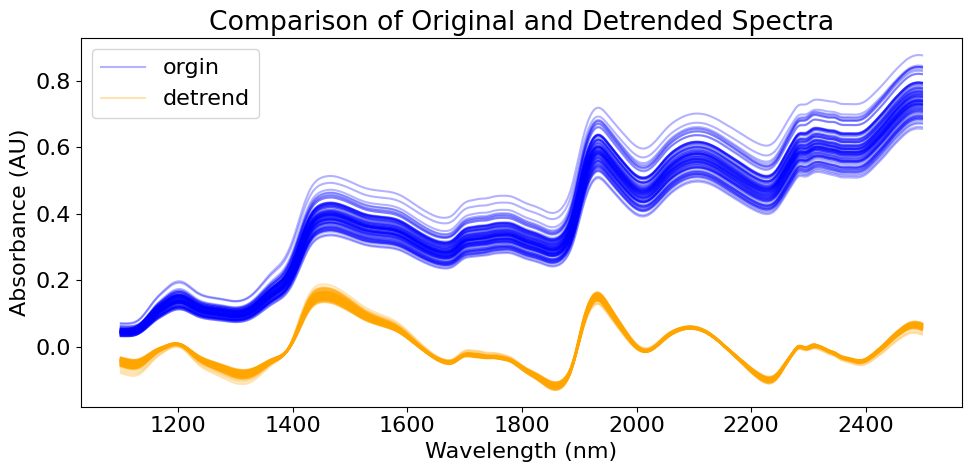

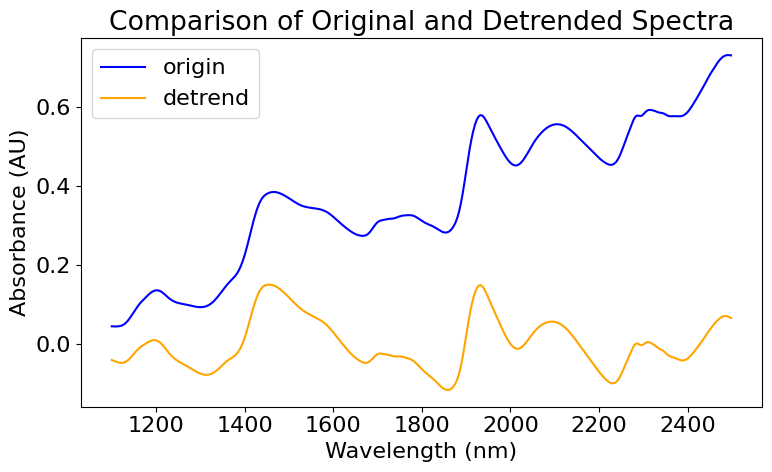

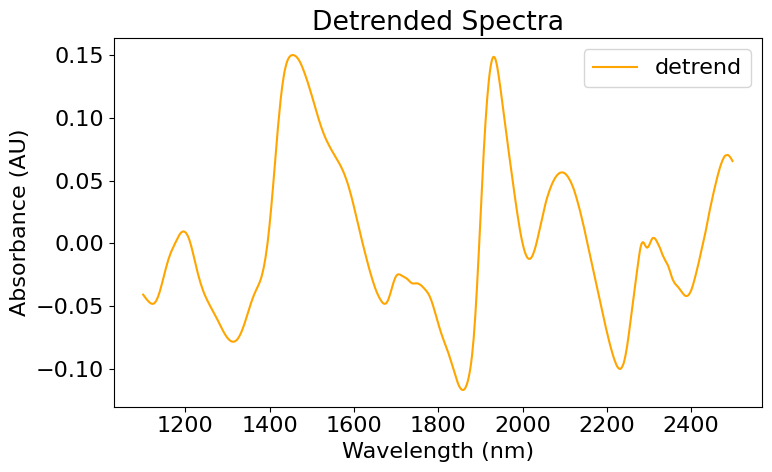

In [12]:
import numpy as np
import pandas as pd
from scipy.signal import detrend
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

# Load the data
data_path = 'D:/A/CSU/数据集/corn_xlsl/m5_corn.xlsx'
df = pd.read_excel(data_path)
spectra = df.iloc[:, :700].values  

# Dataprocessing
preprocess_method = 'detrend'
spectra_detrend = detrend(spectra, type='linear')

# paint spectra processing and before
wavelengths = np.arange(1100, 1100 + 2 * 700, 2)
plt.figure(figsize=(10, 5))
for i in range(spectra.shape[0]):  
    plt.plot(wavelengths, spectra[i], color='blue', alpha=0.3, label='orgin' if i == 0 else "")
    plt.plot(wavelengths, spectra_detrend[i], color='orange', alpha=0.3, label='detrend' if i == 0 else "")

plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.title('Comparison of Original and Detrended Spectra')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wavelengths, spectra[0], color='blue', label='origin')
plt.plot(wavelengths, spectra_detrend[0], color='orange', label='detrend')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.title('Comparison of Original and Detrended Spectra')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wavelengths, spectra_detrend[0], color='orange', label='detrend')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.title('Detrended Spectra')
plt.legend()
plt.tight_layout()
plt.show()

一阶微分预处理

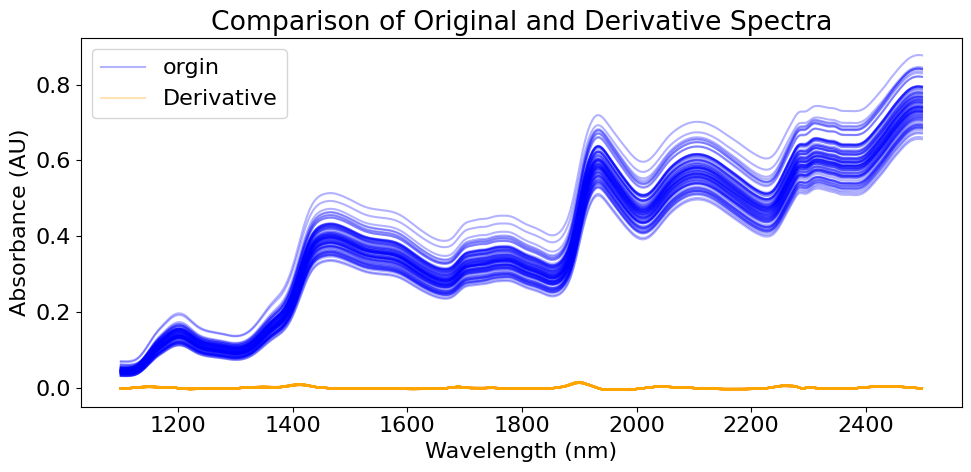

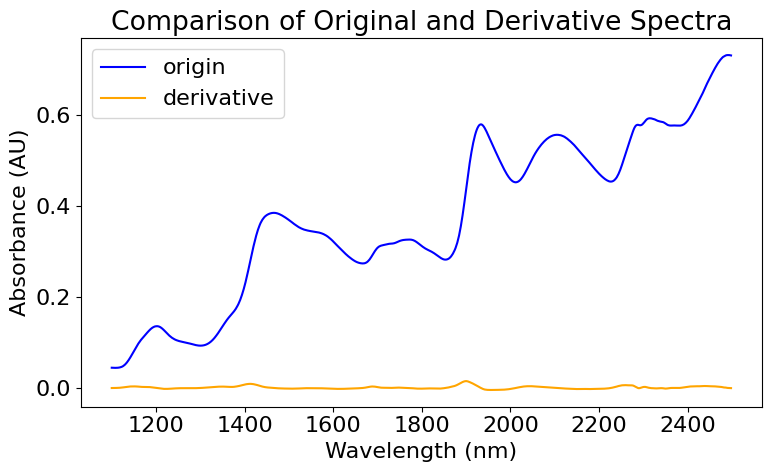

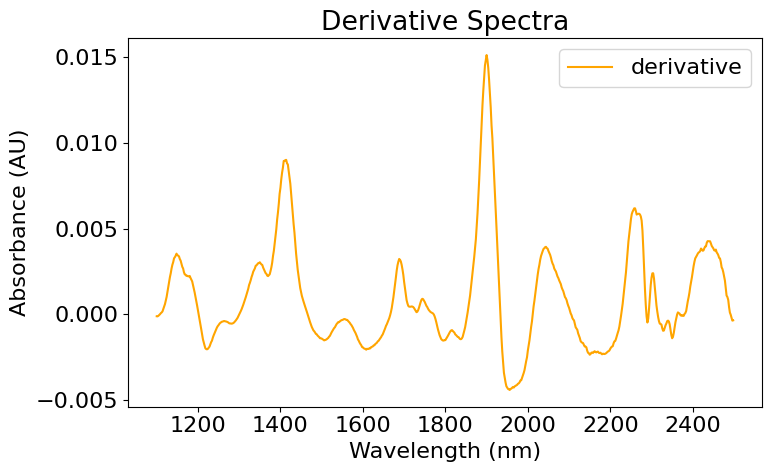

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

data_path = 'D:/A/CSU/数据集/corn_xlsl/m5_corn.xlsx'
df = pd.read_excel(data_path)
spectra = df.iloc[:, :700].values 

def spectral_first_order_derivative(X):
        """光谱一阶微分处理"""
        derivative_X = np.zeros_like(X)
        for i in range(X.shape[0]):
        # 对每个样本进行一阶微分处理
        # 使用中心差分法，两端点使用前向和后向差分
            derivative_X[i, 0] = X[i, 1] - X[i, 0]  # 前向差分
            for j in range(1, X.shape[1] - 1):
                derivative_X[i, j] = (X[i, j + 1] - X[i, j - 1]) / 2  # 中心差分
            derivative_X[i, -1] = X[i, -1] - X[i, -2]  # 后向差分
        return derivative_X

# Dataprocessing
preprocess_method = 'derivative'
spectra_derivative = spectral_first_order_derivative(spectra)

# paint spectra processing and before
wavelengths = np.arange(1100, 1100 + 2 * 700, 2)
plt.figure(figsize=(10, 5))
for i in range(spectra.shape[0]):  
    plt.plot(wavelengths, spectra[i], color='blue', alpha=0.3, label='orgin' if i == 0 else "")
    plt.plot(wavelengths, spectra_derivative[i], color='orange', alpha=0.3, label='Derivative' if i == 0 else "")

plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.title('Comparison of Original and Derivative Spectra')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wavelengths, spectra[0], color='blue', label='origin')
plt.plot(wavelengths, spectra_derivative[0], color='orange', label='derivative')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.title('Comparison of Original and Derivative Spectra')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wavelengths, spectra_derivative[0], color='orange', label='derivative')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.title('Derivative Spectra')
plt.legend()
plt.tight_layout()
plt.show()

Savitzky-Golay预处理

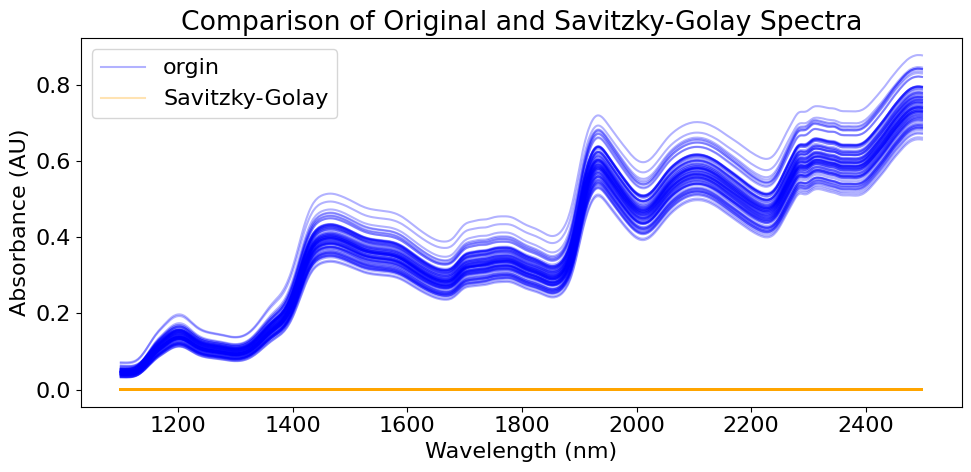

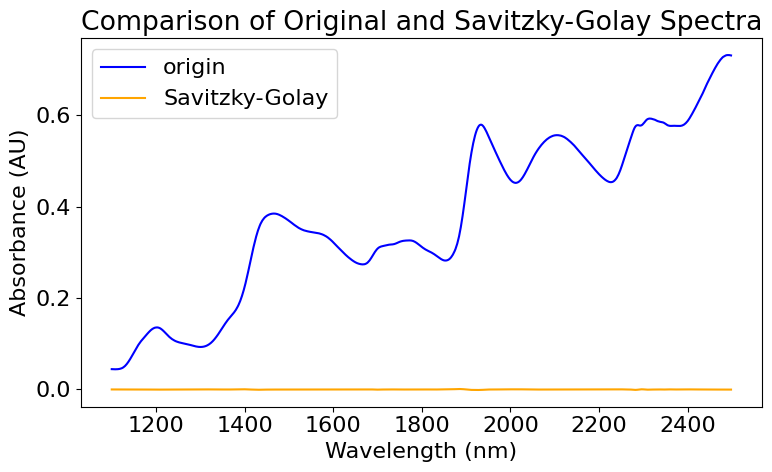

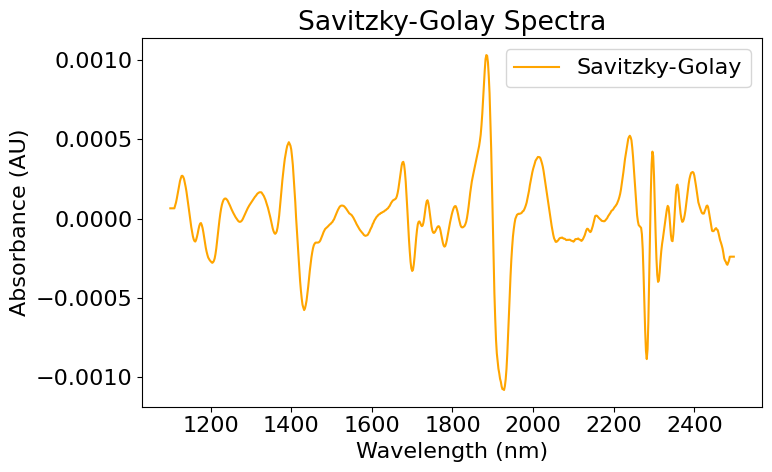

In [10]:
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

# Load the data
data_path = 'D:/A/CSU/数据集/corn_xlsl/m5_corn.xlsx'
df = pd.read_excel(data_path)
spectra = df.iloc[:, :700].values  

# Dataprocessing
preprocess_method = 'Savitzky-Golay 2nd Derivative'
spectra_sg = savgol_filter(spectra, window_length=11, polyorder=2, deriv=2, axis=1)

# paint spectra processing and before
wavelengths = np.arange(1100, 1100 + 2 * 700, 2)
plt.figure(figsize=(10, 5))
for i in range(spectra.shape[0]):  
    plt.plot(wavelengths, spectra[i], color='blue', alpha=0.3, label='orgin' if i == 0 else "")
    plt.plot(wavelengths, spectra_sg[i], color='orange', alpha=0.3, label='Savitzky-Golay' if i == 0 else "")

plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.title('Comparison of Original and Savitzky-Golay Spectra')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wavelengths, spectra[0], color='blue', label='origin')
plt.plot(wavelengths, spectra_sg[0], color='orange', label='Savitzky-Golay')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.title('Comparison of Original and Savitzky-Golay Spectra')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wavelengths, spectra_sg[0], color='orange', label='Savitzky-Golay')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.title('Savitzky-Golay Spectra')
plt.legend()
plt.tight_layout()
plt.show()

原始光谱

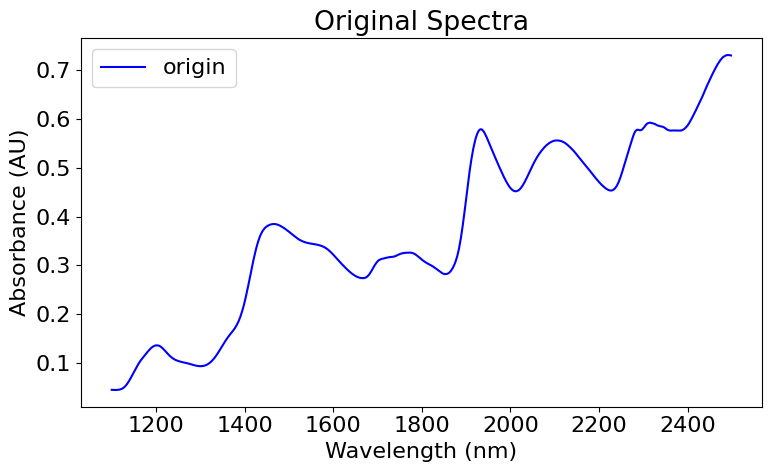

In [9]:
import numpy as np
import pandas as pd
from airPLS import airPLS
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

# Load the data
data_path = 'D:/A/CSU/数据集/corn_xlsl/m5_corn.xlsx'
df = pd.read_excel(data_path)
spectra = df.iloc[:, :700].values   


# paint spectra processing and before
wavelengths = np.arange(1100, 1100 + 2 * 700, 2)


plt.figure(figsize=(8, 5))
plt.plot(wavelengths, spectra[0], color='blue', label='origin')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.title('Original Spectra')
plt.legend()
plt.tight_layout()
plt.show()

airPLS预处理


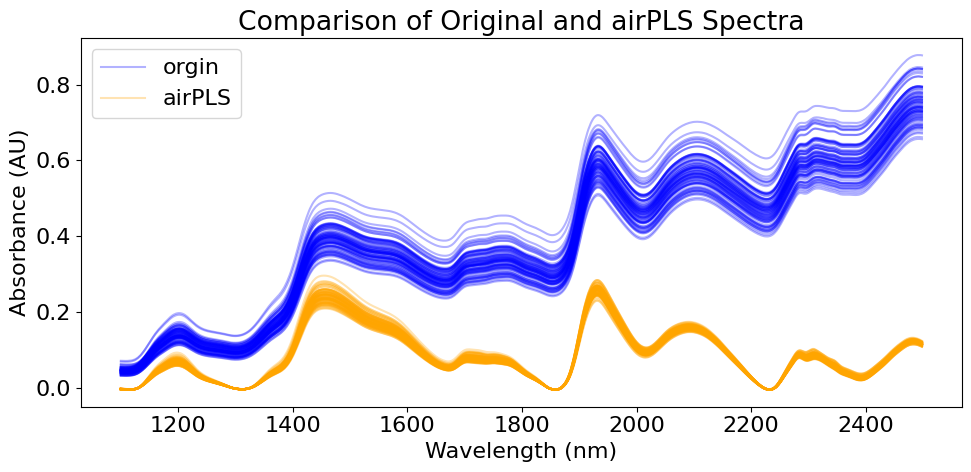

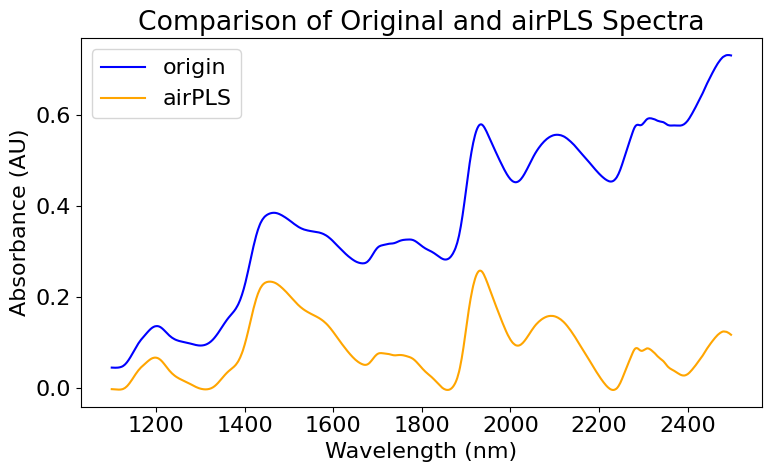

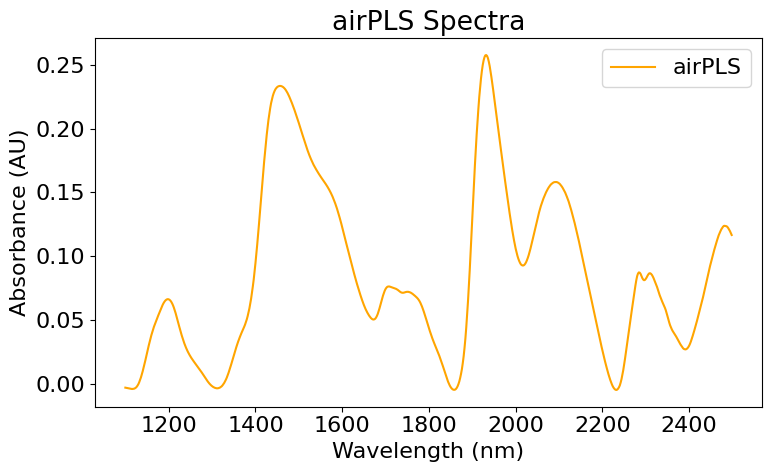

In [1]:
import numpy as np
import pandas as pd
from airPLS import airPLS
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

# Load the data
data_path = 'D:/A/CSU/数据集/corn_xlsl/m5_corn.xlsx'
df = pd.read_excel(data_path)
spectra = df.iloc[:, :700].values  

def airPLS_batch(X, lambda_=100, porder=1, itermax=15):
    X_corr = np.zeros_like(X)
    for i in range(X.shape[0]):
        baseline = airPLS(X[i], lambda_=lambda_, porder=porder, itermax=itermax)
        X_corr[i] = X[i] - baseline
    return X_corr

# Dataprocessing
preprocess_method = 'airPLS'
spectra_airpls = airPLS_batch(spectra)

# paint spectra processing and before
wavelengths = np.arange(1100, 1100 + 2 * 700, 2)
plt.figure(figsize=(10, 5))
for i in range(spectra.shape[0]):  
    plt.plot(wavelengths, spectra[i], color='blue', alpha=0.3, label='orgin' if i == 0 else "")
    plt.plot(wavelengths, spectra_airpls[i], color='orange', alpha=0.3, label='airPLS' if i == 0 else "")

plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.title('Comparison of Original and airPLS Spectra')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wavelengths, spectra[0], color='blue', label='origin')
plt.plot(wavelengths, spectra_airpls[0], color='orange', label='airPLS')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.title('Comparison of Original and airPLS Spectra')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wavelengths, spectra_airpls[0], color='orange', label='airPLS')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.title('airPLS Spectra')
plt.legend()
plt.tight_layout()
plt.show()